# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrUa-2019-02-19.zip
unzip autoriaNumberplateOcrUa-2019-02-19.zip
mv autoriaNumberplateOcrUa-2019-02-19 ua
```
or use your own dataset.

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "ua"
VERSION = "12"
MODE = "cpu"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}-{}.h5'.format(DATASET_NAME, VERSION, MODE))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

Using TensorFlow backend.


In [2]:
from Base import OCR

class ua(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        
        self.EPOCHS = 1

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 6 A I T

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


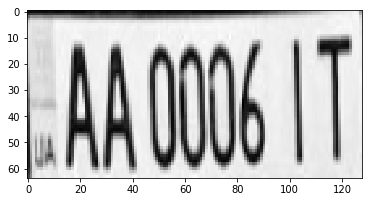

2) the_labels (plate number): AA0006IT is encoded as [2, 2, 0, 0, 0, 1, 3, 4]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED


In [3]:
ocrTextDetector = ua()
model = ocrTextDetector.prepare(PATH_TO_DATASET, aug_count=0)

In [4]:
model = ocrTextDetector.train(mode=MODE)


START TRAINING
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          (None, 128, 64, 1)   0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input[0][0]                  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
_____________________________________________________________________________________________

In [5]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 
True: 			 AA0006IT
acc: 0.0


In [6]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)
#model = ocrTextDetector.load(RESULT_MODEL_PATH)

SAVED TO /mnt/data/www/nomeroff-net/models/anpr_ocr_ua_12-cpu.h5
